## Project Description:

- This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


### Attribute Information:

- For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

### Prediction: 

- The minimum temperature for the next day (Next_Tmin) and,
- The maximum temperature for the next day (Next_Tmax), 
  based on the details provided in the dataset.

### Dataset Link:

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


## Read and understand dataset

In [1104]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1105]:
os.chdir("F:\FlipRobo\Project Evaluation\Temperature prediction")

In [1106]:
df=pd.read_csv("temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [1107]:
df.shape

(7752, 25)

#### Observation:
- Rows: 7752, Columns: 25


#### Next:
- To check data type

In [1108]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

#### Observation:
- Date: Categorical 
- Rest all: Numerical.

#### Next:
- To change datatype of column "Date" to datetime format

In [1109]:
df['Date']=pd.to_datetime(df.Date,format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

#### Observation
- All the features are in appropriate format.

#### Next:
- To convert variable 'Date'as index

In [1110]:
df1=df.set_index('Date',inplace=False)
df1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


#### Observation: 
- "Date" has got converted to index format

#### Next:
- To drop variable "station" as it is just meant to identify the weather station. It has got no physical influence.

In [1111]:
df2=df1.drop(columns='station', inplace=False)
df2.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## Exploratory data analysis

### (i) Missing values

In [1112]:
df2.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

#### Observation:
- All the variables are continuous.

#### Next:
- To impute the missing values by the mean of the respective variables.

In [1113]:
# Replace missing values with the mean of the variable
df2[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin']] = df2[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin']].fillna(df2[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin']].mean())


In [1114]:
df2.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

#### Observation:
- There are no missing values.

#### Next:
- To explore and visualize data distribution

### (ii) Explore data distribution

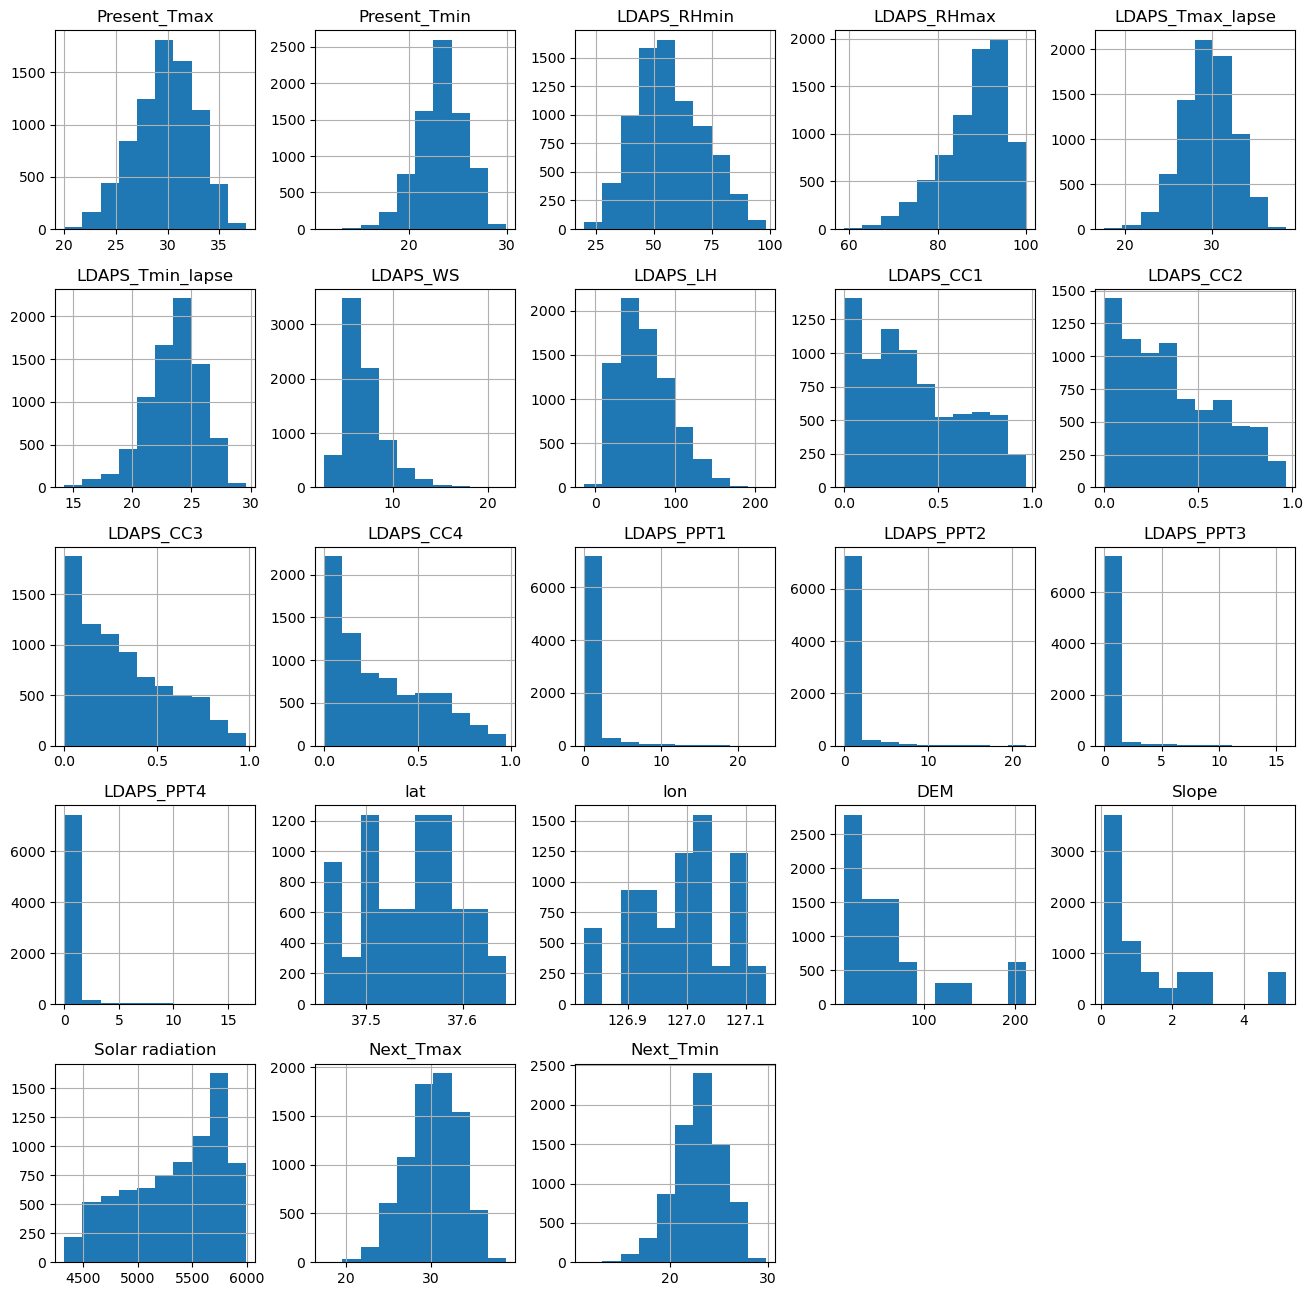

In [1115]:
df2.hist(figsize=(16,16))
plt.show()

#### Observation:
- Some variables are skewed.

#### Next
- To find the skewness of the variables

In [1116]:
round((df2.skew()),2)

Present_Tmax       -0.26
Present_Tmin       -0.37
LDAPS_RHmin         0.30
LDAPS_RHmax        -0.86
LDAPS_Tmax_lapse   -0.23
LDAPS_Tmin_lapse   -0.58
LDAPS_WS            1.58
LDAPS_LH            0.67
LDAPS_CC1           0.46
LDAPS_CC2           0.47
LDAPS_CC3           0.64
LDAPS_CC4           0.67
LDAPS_PPT1          5.39
LDAPS_PPT2          5.78
LDAPS_PPT3          6.46
LDAPS_PPT4          6.83
lat                 0.09
lon                -0.29
DEM                 1.72
Slope               1.56
Solar radiation    -0.51
Next_Tmax          -0.34
Next_Tmin          -0.40
dtype: float64

#### Observation:
- LDAPS_WS, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope  are highly positively skewed variables.

#### Next:
- To check outliers of the variables using boxplot.

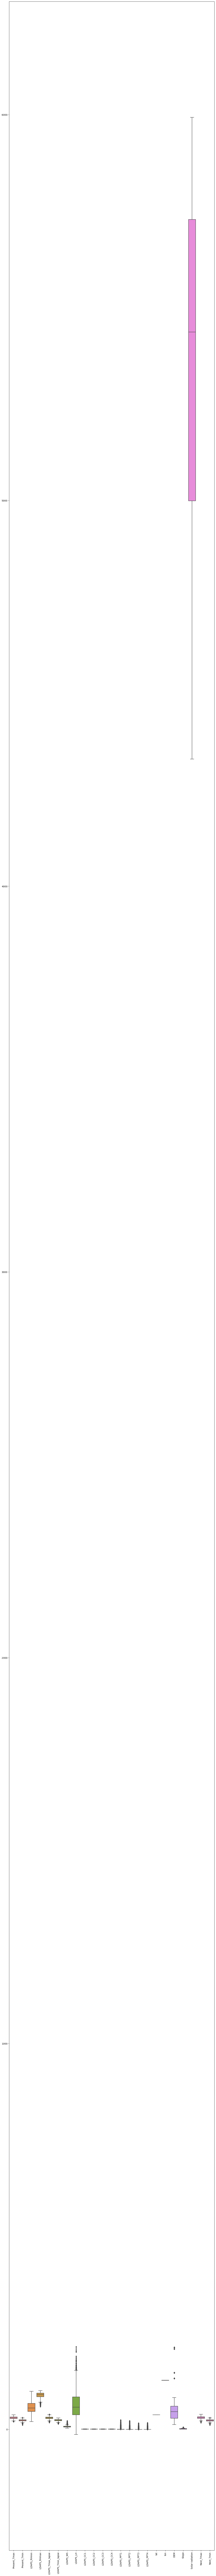

In [1117]:
plt.figure(figsize=(16,200))
# for i in Numerical:
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

#### Observation:
- There are significant outliers.

#### Next:
- To check for multicollinearity

### (iii) Correlation Analysis:
   - To compute and visualize pairwise correlations between numerical variables using heatmap.
   - To identify highly correlated variables (correlation coefficient > 0.7 or < -0.7).

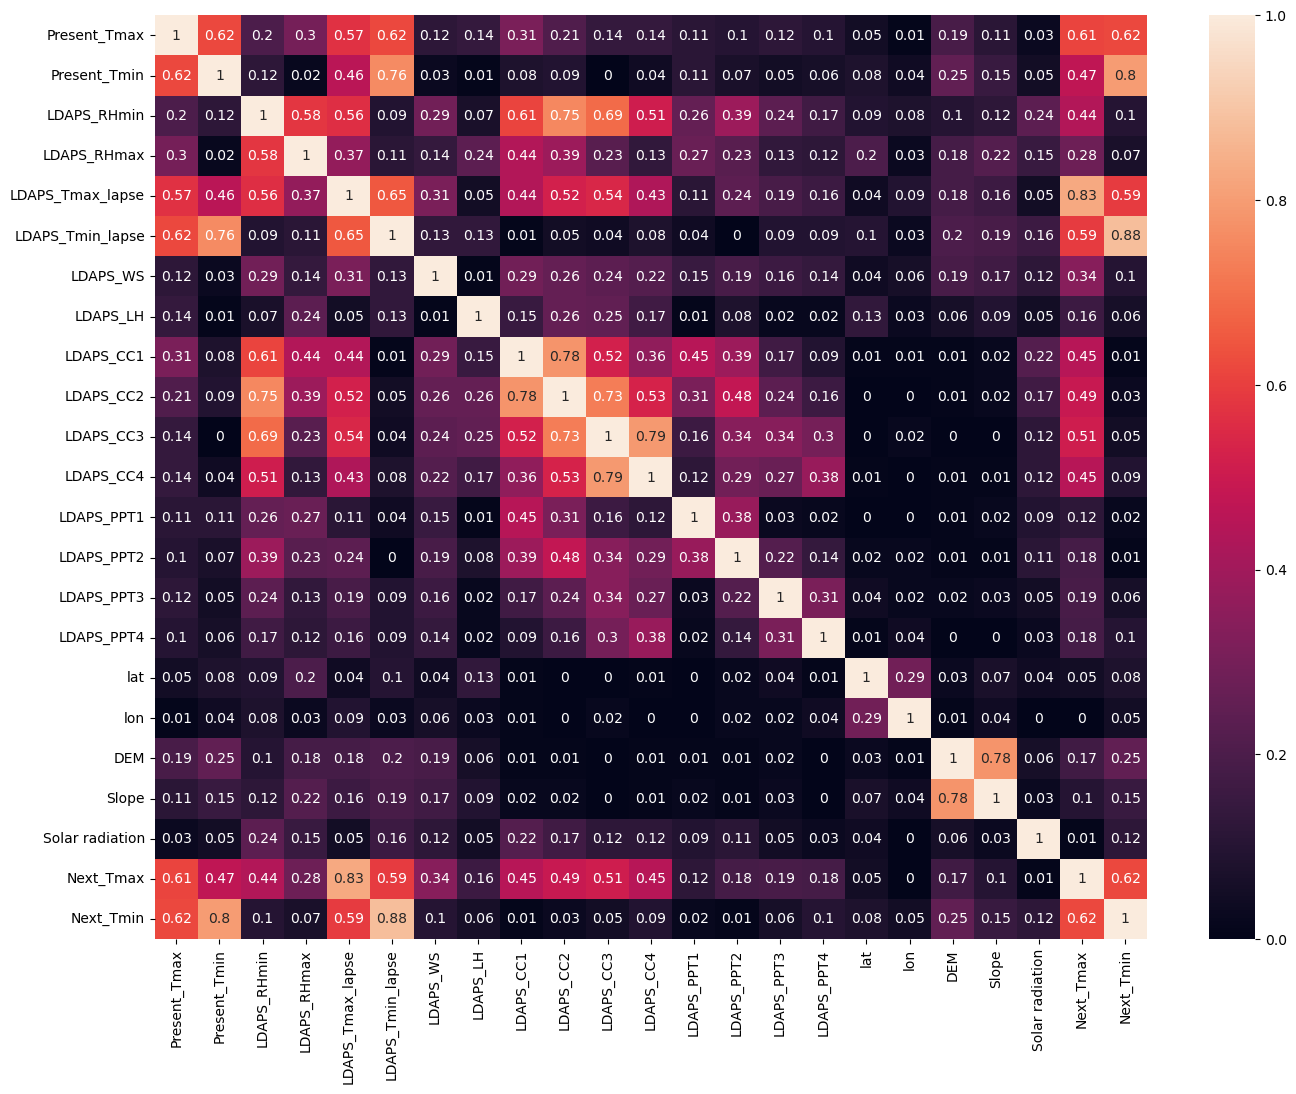

In [1118]:
# Heatmap for correlation coefficient
plt.figure(figsize=(16,12))
sns.heatmap(round(abs(df2.corr()),2),annot=True)
plt.show()

#### Observation: Variables for which absolute value of correlation coefficient is more than 0.7 are:-

- 'Present_Tmin' is highly correlated with 'LDAPS_Tmin_lapse', and 'Next_Tmin'.

- 'LDAPS_Tmax_lapse' is highly correlated with 'Next_Tmax'. 

- 'LDAPS_Tmin_lapse' is highly correlated with 'Next_Tmin'. 

- 'LDAPS_CC1' is highly correlated with 'LDAPS_CC2'.

- 'LDAPS_CC2' is highly correlated with 'LDAPS_CC3'.

- 'LDAPS_CC3' is highly correlated with 'LDAPS_CC4'.

- 'DEM' is highly correlated with 'Slope'.

- 'LDAPS_RHmin' is highly correlated with 'LDAPS_CC2'.

#### Next:
- To transform variables (using Box cox transformation) to address skewness.
- To perform variance inflation factor analysis to address multicillinearity

### (iv) Feature engineering

- To perform boxcox transformation to reduce skewness of the variables( having absolute skewness > 0.7)

In [1119]:
for i in df2.columns:
    if abs(df2[i].skew())>0.7:
        print (round(df2[i].skew(),2))

-0.86
1.58
5.39
5.78
6.46
6.83
1.72
1.56


In [1120]:
from scipy.stats import boxcox
X=pd.DataFrame()
for i in df2.columns:
    if abs(df2[i].skew())>0.7:
        transformed_data, lambda_value = boxcox(df2[i]+10**(-10)) 
        X[i]=transformed_data
        sk1=pd.Series(X[i]).skew()
        print(f'{i} = {sk1:.2f}')

LDAPS_RHmax = -0.12
LDAPS_WS = -0.00
LDAPS_PPT1 = 0.53
LDAPS_PPT2 = 0.70
LDAPS_PPT3 = 0.79
LDAPS_PPT4 = 1.11
DEM = 0.04
Slope = 0.01


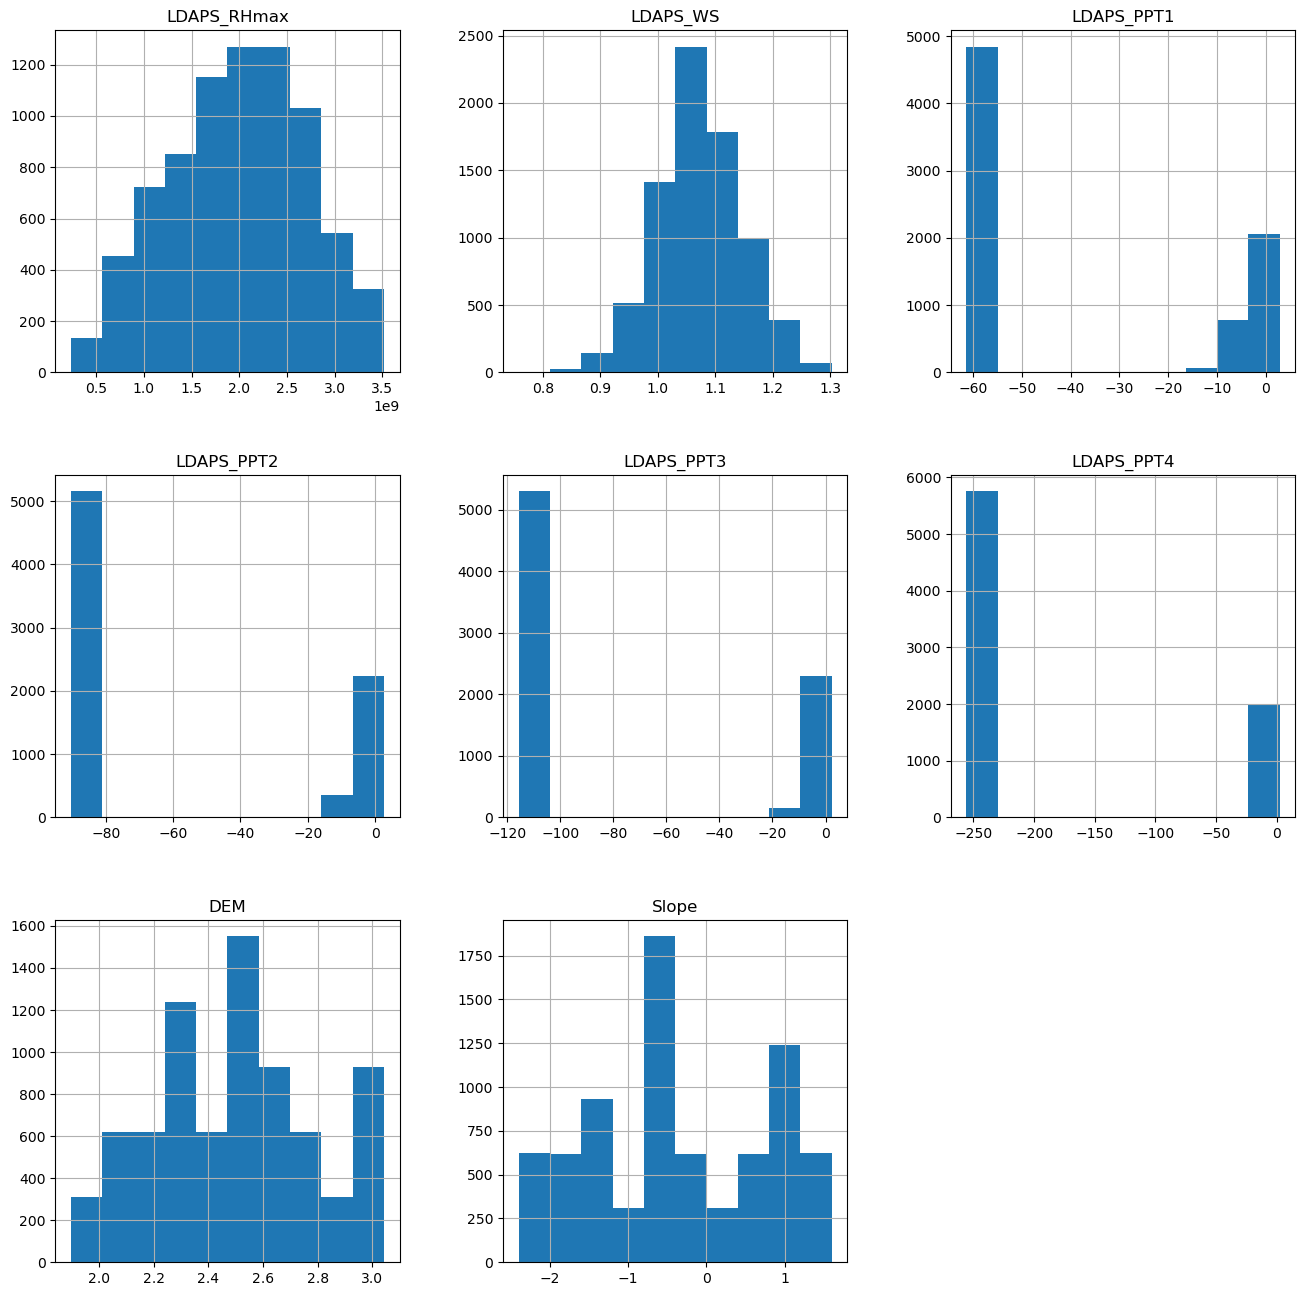

In [1121]:
X[['LDAPS_RHmax','LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4','DEM','Slope']].hist(figsize=(16,16))
plt.show()

#### Observbation:
- The skewness has considerably reduced.

#### Next:
- Dropping the transformed variables and concatenating the corresponding transformed variables with it. 

In [1122]:
df3=df2.drop(columns=['LDAPS_RHmax','LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4','DEM','Slope'], inplace=False)
df3.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,28.074101,23.006936,69.451805,0.233947,0.203896,0.161697,0.130928,37.6046,126.991,5992.895996,29.1,21.2
2013-06-30,31.9,21.6,52.263397,29.850689,24.035009,51.937448,0.225508,0.251771,0.159444,0.127727,37.6046,127.032,5869.312500,30.5,22.5
2013-06-30,31.6,23.3,48.690479,30.091292,24.565633,20.573050,0.209344,0.257469,0.204091,0.142125,37.5776,127.058,5863.555664,31.1,23.9
2013-06-30,32.0,23.4,58.239788,29.704629,23.326177,65.727144,0.216372,0.226002,0.161157,0.134249,37.6450,127.022,5856.964844,31.7,24.3
2013-06-30,31.4,21.9,56.174095,29.113934,23.486480,107.965535,0.151407,0.249995,0.178892,0.170021,37.5507,127.135,5859.552246,31.2,22.5


In [1123]:
df5=df2[['LDAPS_RHmax','LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4','DEM','Slope']]
df4=pd.concat([df3,df5],axis=1)

In [1124]:
df4.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,Next_Tmax,Next_Tmin,LDAPS_RHmax,LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,28.074101,23.006936,69.451805,0.233947,0.203896,0.161697,0.130928,...,29.1,21.2,91.116364,6.818887,0.0,0.0,0.0,0.0,212.3350,2.7850
2013-06-30,31.9,21.6,52.263397,29.850689,24.035009,51.937448,0.225508,0.251771,0.159444,0.127727,...,30.5,22.5,90.604721,5.691890,0.0,0.0,0.0,0.0,44.7624,0.5141
2013-06-30,31.6,23.3,48.690479,30.091292,24.565633,20.573050,0.209344,0.257469,0.204091,0.142125,...,31.1,23.9,83.973587,6.138224,0.0,0.0,0.0,0.0,33.3068,0.2661
2013-06-30,32.0,23.4,58.239788,29.704629,23.326177,65.727144,0.216372,0.226002,0.161157,0.134249,...,31.7,24.3,96.483688,5.650050,0.0,0.0,0.0,0.0,45.7160,2.5348
2013-06-30,31.4,21.9,56.174095,29.113934,23.486480,107.965535,0.151407,0.249995,0.178892,0.170021,...,31.2,22.5,90.155128,5.735004,0.0,0.0,0.0,0.0,35.0380,0.5055


#### Observation:
- The transformed variables got concatenated with the data frame

#### Next:
- To estimate the extent of multicollinearity using variance inflation factor (VIF)

## PART 1: Predict Next_Tmin

In [1125]:
### Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1=df4.drop(columns='Next_Tmin',inplace=False)
y=df4['Next_Tmin']
VIF=pd.DataFrame()
VIF["Features"]=X1.columns
VIF["VIF value"]=[round(variance_inflation_factor(X1.values, i),2) for i in range(len(X1.columns))]
VIF

,Features,VIF value
0,Present_Tmax,296.03
1,Present_Tmin,291.61
2,LDAPS_RHmin,104.05
3,LDAPS_Tmax_lapse,887.15
4,LDAPS_Tmin_lapse,728.98
5,LDAPS_LH,6.85
6,LDAPS_CC1,10.57
7,LDAPS_CC2,15.26
8,LDAPS_CC3,13.84
9,LDAPS_CC4,7.21


#### Obserbvation:
- 'lat' and 'lon' have very high VIF value.

#### Next:

- Tree based models like Decision tree, Random forest, GradientBoost algorithms or Regularized regression model like ridge regression, is also expected to work reasonably well in the presence of multicollinearity.


- To check the scale of variation of different variables.

In [1126]:
# Scaling of the variables
X1.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,Solar radiation,Next_Tmax,LDAPS_RHmax,LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.768211,23.225059,56.759372,29.613447,23.512589,62.505019,0.368774,0.356080,0.318404,0.299191,...,5341.502803,30.274887,88.374804,7.097875,0.591995,0.485003,0.278200,0.269407,61.867972,1.257048
std,2.956557,2.403036,14.596973,2.932898,2.333973,33.567001,0.261185,0.256810,0.249148,0.253114,...,429.158867,3.122557,7.157124,2.173245,1.936331,1.754258,1.156174,1.200364,54.279780,1.370444
min,20.000000,11.300000,19.794666,17.624954,14.272646,-13.603212,0.000000,0.000000,0.000000,0.000000,...,4329.520508,17.400000,58.936283,2.882580,0.000000,0.000000,0.000000,0.000000,12.370000,0.098475
25%,27.800000,21.700000,46.046162,27.693091,22.114651,37.532764,0.148321,0.142328,0.103100,0.082741,...,4999.018555,28.200000,84.316923,5.686487,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300
50%,29.900000,23.400000,55.313244,29.662273,23.735942,57.310630,0.320110,0.315667,0.265264,0.232354,...,5436.345215,30.500000,89.699505,6.563068,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000
75%,32.000000,24.900000,67.038254,31.683819,25.134000,83.904586,0.571696,0.554963,0.494007,0.497230,...,5728.316406,32.600000,93.704500,8.007471,0.067593,0.024276,0.009697,0.000693,59.832400,1.767800
max,37.600000,29.900000,98.524734,38.542255,29.619342,213.414006,0.967277,0.968353,0.983789,0.974710,...,5992.895996,38.900000,100.000153,21.857621,23.701544,21.621661,15.841235,16.655469,212.335000,5.178230


#### Observation:
- 'LDAPS_LH' and 'Solar radiation' are at higher end of their maximum values whereas 'LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3',and 'LDAPS_CC4' are at the lower end of their maximum values.

#### Next:
- Using min max scaler to scale the variables in the range of 0 to 1.

In [1127]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X2=scale.fit_transform(X1)
X3=pd.DataFrame(X2, columns=X1.columns)
X3.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,Solar radiation,Next_Tmax,LDAPS_RHmax,LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,0.555012,0.641132,0.469512,0.573138,0.602080,0.335253,0.381249,0.367718,0.323651,0.306954,...,0.608391,0.598832,0.716896,0.222149,0.024977,0.022431,0.017562,0.016175,0.247533,0.228077
std,0.167986,0.129195,0.185405,0.140214,0.152083,0.147861,0.270020,0.265203,0.253254,0.259681,...,0.258005,0.145235,0.174292,0.114532,0.081696,0.081134,0.072985,0.072070,0.271446,0.269785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.443182,0.559140,0.333437,0.481331,0.510990,0.225252,0.153339,0.146980,0.104799,0.084888,...,0.402494,0.502326,0.618077,0.147768,0.000000,0.000000,0.000000,0.000000,0.081664,0.034022
50%,0.562500,0.650538,0.451144,0.575472,0.616634,0.312372,0.330939,0.325983,0.269635,0.238383,...,0.665409,0.609302,0.749155,0.193965,0.000000,0.000000,0.000000,0.000000,0.166759,0.102274
75%,0.681818,0.731183,0.600070,0.672117,0.707732,0.429517,0.591037,0.573100,0.502148,0.510132,...,0.840938,0.706977,0.846686,0.270086,0.002852,0.001123,0.000612,0.000042,0.237354,0.328623
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:
- All the variables have been scaled between 0 and 1.

#### Next:
- To building the model. The variable 'Next_Tmin' to be predicted is a continuous variable.  

### Model building

In [1128]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

#### Random state: To estimate the best random state

In [1129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
r2_max=0
r_state=0
LR=LinearRegression()
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.3,random_state=i)
    
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    if r2>r2_max:
        r2_max=r2
        r_state=i
print(f'Best r2 score: {round(r2_max,2)}')
print(f'Random state: {r_state}')
        

Best r2 score: 0.86
Random state: 808


#### Observation:
- The best random state is 808.

#### Next
- Using random_state = 808 across all the algorithms.

### Linear Regression

In [1130]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.3,random_state=r_state)
LR1=LinearRegression()
model=LR1.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
cv_score=cross_val_score(LR1,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,3)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.862
Mean absolute error: 0.75
Mean square error: 0.91
Cross validation score: 0.84


### Ridge Regression

In [1131]:
RR=Ridge()
model_RR=RR.fit(X_train,y_train)
y_pred_RR=model_RR.predict(X_test)
r2=r2_score(y_test,y_pred_RR)
MAE=mean_absolute_error(y_test,y_pred_RR)
MSE=mean_squared_error(y_test,y_pred_RR)
cv_score=cross_val_score(RR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,3)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.862
Mean absolute error: 0.75
Mean square error: 0.91
Cross validation score: 0.84


### Lasso Regression

In [1132]:
LaR=Lasso(alpha=0.001)
model_LaR=LaR.fit(X_train,y_train)
y_pred_LaR=model_LaR.predict(X_test)
r2=r2_score(y_test,y_pred_LaR)
MAE=mean_absolute_error(y_test,y_pred_LaR)
MSE=mean_squared_error(y_test,y_pred_LaR)
cv_score=cross_val_score(LaR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,3)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.862
Mean absolute error: 0.75
Mean square error: 0.91
Cross validation score: 0.84


### Decission Tree Regression

In [1133]:
DT=DecisionTreeRegressor()
model_DT=DT.fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
r2=r2_score(y_test,y_pred_DT)
MAE=mean_absolute_error(y_test,y_pred_DT)
MSE=mean_squared_error(y_test,y_pred_DT)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.81
Mean absolute error: 0.83
Mean square error: 1.28
Cross validation score: 0.77


### Random Forest Regression

In [1134]:
RF=RandomForestRegressor()
model_RF=RF.fit(X_train,y_train)
y_pred_RF=model_RF.predict(X_test)
r2=r2_score(y_test,y_pred_RF)
MAE=mean_absolute_error(y_test,y_pred_RF)
MSE=mean_squared_error(y_test,y_pred_RF)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.91
Mean absolute error: 0.57
Mean square error: 0.58
Cross validation score: 0.9


### Gradient Boosting Regression

In [1135]:
GB=GradientBoostingRegressor()
model_GB=GB.fit(X_train,y_train)
y_pred_GB=model_GB.predict(X_test)
r2=r2_score(y_test,y_pred_GB)
MAE=mean_absolute_error(y_test,y_pred_GB)
MSE=mean_squared_error(y_test,y_pred_GB)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.9
Mean absolute error: 0.63
Mean square error: 0.65
Cross validation score: 0.89


### Adaboost Regression

In [1136]:
AR=AdaBoostRegressor()
model_AR=AR.fit(X_train,y_train)
y_pred_AR=model_AR.predict(X_test)
r2=r2_score(y_test,y_pred_AR)
MAE=mean_absolute_error(y_test,y_pred_AR)
MSE=mean_squared_error(y_test,y_pred_AR)
cv_score=cross_val_score(AR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.83
Mean absolute error: 0.84
Mean square error: 1.1
Cross validation score: 0.81


### Bagging Regression

In [1137]:
BR=BaggingRegressor()
model_BR=BR.fit(X_train,y_train)
y_pred_BR=model_BR.predict(X_test)
r2=r2_score(y_test,y_pred_BR)
MAE=mean_absolute_error(y_test,y_pred_BR)
MSE=mean_squared_error(y_test,y_pred_BR)
cv_score=cross_val_score(BR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.9
Mean absolute error: 0.61
Mean square error: 0.65
Cross validation score: 0.89


### K Neighbors Regression

In [1138]:
KN=KNeighborsRegressor()
model_KN=KN.fit(X_train,y_train)
y_pred_KN=model_KN.predict(X_test)
r2=r2_score(y_test,y_pred_KN)
MAE=mean_absolute_error(y_test,y_pred_KN)
MSE=mean_squared_error(y_test,y_pred_KN)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.85
Mean absolute error: 0.74
Mean square error: 0.98
Cross validation score: 0.84


#### Observation: 
- Among the various regression models build, the best performing models are of Random forest, Gradient boosting and Bagging Regression, each have r2 score of 0.9. 


- This suggests that the tree based regression model explains the dependence of input variable on the target varaiable much better than any other model. This is expected as there is multicollinearity in the varaibles.


#### Next:

- To optimize the Random forest regression model with the best hyper parameters, a hyperparameter tuning will be performed.

### Hyperparameter tuning: Random forest regression model

In [1139]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [1140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters

hyp1 = {
    'bootstrap': [True],
    'ccp_alpha': [0.0],
    'criterion': ['squared_error'],
    'max_depth': [2, 6, 10, 14, 18, 20, 22, 24],
    'max_features': ['auto'],
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 3, 5, 10],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100, 200, 300],
    'n_jobs': [-1],
    'oob_score': [False],
    'random_state': [r_state],
    'verbose': [0],
    'warm_start': [False]
}

# Define your Random Forest regressor
RF = RandomForestRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(RF, param_grid=hyp1)
grid_search.fit(X_train, y_train)

# Print the best parameters, estimators, and score
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 22, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 808, 'verbose': 0, 'warm_start': False}
Best estimator: RandomForestRegressor(max_depth=22, n_estimators=200, n_jobs=-1,
                      random_state=808)
Best score: 0.8983209827859623


#### Observation: 

- Hyperparameter tuned Random forest regression model does not do better than its default Random forest regression model.

#### Next: 

- Saving the default Random forest regression model.

### Saving the final model: default Random forest regression

In [1141]:
import pickle
RF1=RandomForestRegressor()
model_RF1=RF1.fit(X_train,y_train)
y_pred_RF1=model_RF1.predict(X_test)
r2=r2_score(y_test,y_pred_RF1)
MAE=mean_absolute_error(y_test,y_pred_RF1)
MSE=mean_squared_error(y_test,y_pred_RF1)
cv_score=cross_val_score(RF1,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
file_name='Temperature Forecast_Next_Tmin.pkl'
pickle.dump(RF1,open(file_name,'wb'))

r2 score: 0.91
Mean absolute error: 0.56
Mean square error: 0.57
Cross validation score: 0.9


### Loading the saved model

In [1142]:
loaded_model=pickle.load(open('Temperature Forecast_Next_Tmin.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(round(result,2))

0.91


## PART 2: Predict Next_Tmax

In [1143]:
### Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
X4=df4.drop(columns='Next_Tmax',inplace=False)
y1=df4['Next_Tmax']
VIF=pd.DataFrame()
VIF["Features"]=X1.columns
VIF["VIF value"]=[round(variance_inflation_factor(X1.values, i),2) for i in range(len(X1.columns))]
VIF

,Features,VIF value
0,Present_Tmax,296.03
1,Present_Tmin,291.61
2,LDAPS_RHmin,104.05
3,LDAPS_Tmax_lapse,887.15
4,LDAPS_Tmin_lapse,728.98
5,LDAPS_LH,6.85
6,LDAPS_CC1,10.57
7,LDAPS_CC2,15.26
8,LDAPS_CC3,13.84
9,LDAPS_CC4,7.21


#### Obserbvation:
- 'lat' and 'lon' have very high VIF value.

#### Next:

- Tree based models like Decision tree, Random forest, GradientBoost algorithms or Regularized regression model like ridge regression, is also expected to work reasonably well in the presence of multicollinearity.


- To check the scale of variation of different variables.

In [1144]:
# Scaling of the variables
X4.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,Solar radiation,Next_Tmin,LDAPS_RHmax,LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.768211,23.225059,56.759372,29.613447,23.512589,62.505019,0.368774,0.356080,0.318404,0.299191,...,5341.502803,22.932220,88.374804,7.097875,0.591995,0.485003,0.278200,0.269407,61.867972,1.257048
std,2.956557,2.403036,14.596973,2.932898,2.333973,33.567001,0.261185,0.256810,0.249148,0.253114,...,429.158867,2.483276,7.157124,2.173245,1.936331,1.754258,1.156174,1.200364,54.279780,1.370444
min,20.000000,11.300000,19.794666,17.624954,14.272646,-13.603212,0.000000,0.000000,0.000000,0.000000,...,4329.520508,11.300000,58.936283,2.882580,0.000000,0.000000,0.000000,0.000000,12.370000,0.098475
25%,27.800000,21.700000,46.046162,27.693091,22.114651,37.532764,0.148321,0.142328,0.103100,0.082741,...,4999.018555,21.400000,84.316923,5.686487,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300
50%,29.900000,23.400000,55.313244,29.662273,23.735942,57.310630,0.320110,0.315667,0.265264,0.232354,...,5436.345215,23.100000,89.699505,6.563068,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000
75%,32.000000,24.900000,67.038254,31.683819,25.134000,83.904586,0.571696,0.554963,0.494007,0.497230,...,5728.316406,24.600000,93.704500,8.007471,0.067593,0.024276,0.009697,0.000693,59.832400,1.767800
max,37.600000,29.900000,98.524734,38.542255,29.619342,213.414006,0.967277,0.968353,0.983789,0.974710,...,5992.895996,29.800000,100.000153,21.857621,23.701544,21.621661,15.841235,16.655469,212.335000,5.178230


#### Observation:
- 'LDAPS_LH' and 'Solar radiation' are at higher end of their maximum values whereas 'LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3',and 'LDAPS_CC4' are at the lower end of their maximum values.

#### Next:
- Using min max scaler to scale the variables in the range of 0 to 1.

In [1145]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X5=scale.fit_transform(X4)
X6=pd.DataFrame(X5, columns=X4.columns)
X6.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,Solar radiation,Next_Tmin,LDAPS_RHmax,LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,0.555012,0.641132,0.469512,0.573138,0.602080,0.335253,0.381249,0.367718,0.323651,0.306954,...,0.608391,0.628769,0.716896,0.222149,0.024977,0.022431,0.017562,0.016175,0.247533,0.228077
std,0.167986,0.129195,0.185405,0.140214,0.152083,0.147861,0.270020,0.265203,0.253254,0.259681,...,0.258005,0.134231,0.174292,0.114532,0.081696,0.081134,0.072985,0.072070,0.271446,0.269785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.443182,0.559140,0.333437,0.481331,0.510990,0.225252,0.153339,0.146980,0.104799,0.084888,...,0.402494,0.545946,0.618077,0.147768,0.000000,0.000000,0.000000,0.000000,0.081664,0.034022
50%,0.562500,0.650538,0.451144,0.575472,0.616634,0.312372,0.330939,0.325983,0.269635,0.238383,...,0.665409,0.637838,0.749155,0.193965,0.000000,0.000000,0.000000,0.000000,0.166759,0.102274
75%,0.681818,0.731183,0.600070,0.672117,0.707732,0.429517,0.591037,0.573100,0.502148,0.510132,...,0.840938,0.718919,0.846686,0.270086,0.002852,0.001123,0.000612,0.000042,0.237354,0.328623
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:
- All the variables have been scaled between 0 and 1.

#### Next:
- To building the model. The variable 'Next_Tmax' to be predicted is a continuous variable.  

### Model building

In [1146]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

#### Random state: To estimate the best random state

In [1147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
r2_max=0
r_state=0
LR=LinearRegression()
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X6,y1,test_size=0.3,random_state=i)
    
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    if r2>r2_max:
        r2_max=r2
        r_state=i
print(f'Best r2 score: {round(r2_max,2)}')
print(f'Random state: {r_state}')

Best r2 score: 0.81
Random state: 627


#### Observation:
- The best random state is 627.

#### Next
- Using random_state = 627 across all the algorithms.

### Linear Regression

In [1148]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X6,y1,test_size=0.3,random_state=r_state)
LR1=LinearRegression()
model=LR1.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
cv_score=cross_val_score(LR1,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,3)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.81
Mean absolute error: 1.06
Mean square error: 1.93
Cross validation score: 0.78


### Ridge Regression

In [1149]:
RR=Ridge()
model_RR=RR.fit(X_train,y_train)
y_pred_RR=model_RR.predict(X_test)
r2=r2_score(y_test,y_pred_RR)
MAE=mean_absolute_error(y_test,y_pred_RR)
MSE=mean_squared_error(y_test,y_pred_RR)
cv_score=cross_val_score(RR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,3)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.81
Mean absolute error: 1.06
Mean square error: 1.94
Cross validation score: 0.78


### Lasso Regression

In [1150]:
LaR=Lasso(alpha=0.001)
model_LaR=LaR.fit(X_train,y_train)
y_pred_LaR=model_LaR.predict(X_test)
r2=r2_score(y_test,y_pred_LaR)
MAE=mean_absolute_error(y_test,y_pred_LaR)
MSE=mean_squared_error(y_test,y_pred_LaR)
cv_score=cross_val_score(LaR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,3)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.809
Mean absolute error: 1.06
Mean square error: 1.94
Cross validation score: 0.78


### Decission Tree Regression

In [1151]:
DT=DecisionTreeRegressor()
model_DT=DT.fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
r2=r2_score(y_test,y_pred_DT)
MAE=mean_absolute_error(y_test,y_pred_DT)
MSE=mean_squared_error(y_test,y_pred_DT)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.79
Mean absolute error: 1.03
Mean square error: 2.14
Cross validation score: 0.75


### Random Forest Regression

In [1152]:
RF=RandomForestRegressor()
model_RF=RF.fit(X_train,y_train)
y_pred_RF=model_RF.predict(X_test)
r2=r2_score(y_test,y_pred_RF)
MAE=mean_absolute_error(y_test,y_pred_RF)
MSE=mean_squared_error(y_test,y_pred_RF)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.91
Mean absolute error: 0.71
Mean square error: 0.92
Cross validation score: 0.89


### Gradient Boosting Regression

In [1153]:
GB=GradientBoostingRegressor()
model_GB=GB.fit(X_train,y_train)
y_pred_GB=model_GB.predict(X_test)
r2=r2_score(y_test,y_pred_GB)
MAE=mean_absolute_error(y_test,y_pred_GB)
MSE=mean_squared_error(y_test,y_pred_GB)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.86
Mean absolute error: 0.91
Mean square error: 1.4
Cross validation score: 0.84


### Adaboost Regression

In [1154]:
AR=AdaBoostRegressor()
model_AR=AR.fit(X_train,y_train)
y_pred_AR=model_AR.predict(X_test)
r2=r2_score(y_test,y_pred_AR)
MAE=mean_absolute_error(y_test,y_pred_AR)
MSE=mean_squared_error(y_test,y_pred_AR)
cv_score=cross_val_score(AR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.77
Mean absolute error: 1.22
Mean square error: 2.3
Cross validation score: 0.75


### Bagging Regression

In [1155]:
BR=BaggingRegressor()
model_BR=BR.fit(X_train,y_train)
y_pred_BR=model_BR.predict(X_test)
r2=r2_score(y_test,y_pred_BR)
MAE=mean_absolute_error(y_test,y_pred_BR)
MSE=mean_squared_error(y_test,y_pred_BR)
cv_score=cross_val_score(BR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.89
Mean absolute error: 0.76
Mean square error: 1.08
Cross validation score: 0.88


### K Neighbors Regression

In [1156]:
KN=KNeighborsRegressor()
model_KN=KN.fit(X_train,y_train)
y_pred_KN=model_KN.predict(X_test)
r2=r2_score(y_test,y_pred_KN)
MAE=mean_absolute_error(y_test,y_pred_KN)
MSE=mean_squared_error(y_test,y_pred_KN)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')

r2 score: 0.84
Mean absolute error: 0.95
Mean square error: 1.65
Cross validation score: 0.81


#### Observation: 
- Among the various regression models build, the best performing models are of Random forest and Bagging Regression, each have r2 score of 0.9. 


- This suggests that the tree based regression model explains the dependence of input variable on the target varaiable much better than any other model. This is expected as there is multicollinearity in the varaibles.


#### Next:

- To optimize the Random forest regression model with the best hyper parameters, a hyperparameter tuning will be performed.

### Hyperparameter tuning: Random forest regression model

In [1157]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [1158]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters

hyp1 = {
    'bootstrap': [True],
    'ccp_alpha': [0.0],
    'criterion': ['squared_error'],
    'max_depth': [2, 6, 10, 14, 18, 20, 22, 24],
    'max_features': ['auto'],
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 3, 5, 10],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100, 200, 300],
    'n_jobs': [-1],
    'oob_score': [False],
    'random_state': [r_state],
    'verbose': [0],
    'warm_start': [False]
}

# Define your Random Forest regressor
RF = RandomForestRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(RF, param_grid=hyp1)
grid_search.fit(X_train, y_train)

# Print the best parameters, estimators, and score
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 22, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 627, 'verbose': 0, 'warm_start': False}
Best estimator: RandomForestRegressor(max_depth=22, n_estimators=300, n_jobs=-1,
                      random_state=627)
Best score: 0.8887459855996976


#### Observation: 

- Hyperparameter tuned Random forest regression model does not do better than its default Random forest regression model.

#### Next: 

- Saving the default Random forest regression model.

### Saving the final model: default Random forest regression

In [1159]:
import pickle
RF2=RandomForestRegressor()
model_RF2=RF2.fit(X_train,y_train)
y_pred_RF2=model_RF2.predict(X_test)
r2=r2_score(y_test,y_pred_RF2)
MAE=mean_absolute_error(y_test,y_pred_RF2)
MSE=mean_squared_error(y_test,y_pred_RF2)
cv_score=cross_val_score(RF2,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {round(r2,2)}')
print(f'Mean absolute error: {round(MAE,2)}')
print(f'Mean square error: {round(MSE,2)}')
print(f'Cross validation score: {round(cv_score,2)}')
file_name='Temperature Forecast_Next_Tmax.pkl'
pickle.dump(RF2,open(file_name,'wb'))

r2 score: 0.91
Mean absolute error: 0.71
Mean square error: 0.92
Cross validation score: 0.89


### Loading the saved model

In [1160]:
loaded_model=pickle.load(open('Temperature Forecast_Next_Tmax.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(round(result,2))

0.91
